In [42]:
import pandas as pd
import sklearn.metrics as metrics
import matplotlib.pyplot as plt
import numpy as np

In [43]:
X_train = pd.read_csv("sets/X_train.csv")
X_test = pd.read_csv("sets/X_test.csv")
y_train = pd.read_csv("sets/y_train.csv")
y_test = pd.read_csv("sets/y_test.csv")


X_train_oversampled = pd.read_csv("sets/X_train_oversampled.csv")
X_test_oversampled = pd.read_csv("sets/X_test_oversampled.csv")
y_train_oversampled = pd.read_csv("sets/y_train_oversampled.csv")
y_test_oversampled = pd.read_csv("sets/y_test_oversampled.csv")

### KNN Regression

In order to find the best value for $k$, we will train and make predictions on different models with
$$
    k = 1, 2, \ldots, 10.
$$
For each model we will then score the predictions and choose the $k$ with the best score.

In [44]:
# We will use the scikit-learn implementation of the model
from sklearn.neighbors import KNeighborsRegressor

knn_models = {}

knn_models_oversampled = {}

# We will analize models with different 'k' values
max_k = 10

for k in range(1, max_k + 1):
    print(f"Creating KNN model with n_neighbors = {k}")
    knn_models[k] = KNeighborsRegressor(n_neighbors=k)
    knn_models[k].fit(X_train, y_train)

    knn_models_oversampled[k] = KNeighborsRegressor(n_neighbors=k)
    knn_models_oversampled[k].fit(X_train_oversampled, y_train_oversampled)


Creating KNN model with n_neighbors = 1
Creating KNN model with n_neighbors = 2
Creating KNN model with n_neighbors = 3
Creating KNN model with n_neighbors = 4
Creating KNN model with n_neighbors = 5
Creating KNN model with n_neighbors = 6
Creating KNN model with n_neighbors = 7
Creating KNN model with n_neighbors = 8
Creating KNN model with n_neighbors = 9
Creating KNN model with n_neighbors = 10


After the training is complete we will the all the $15$ models, and score their prediction using *Mean Squared Error* (or **RMSE**) and the *R2* scores.

The best model will be the one with the *lowest* **RMSE** score and the *highest* **R2** score.

In [45]:
y_predictions = {}
RMSE_knn = {}
R2_knn = {}

y_predictions_oversampled = {}
RMSE_knn_oversampled = {}
R2_knn_oversampled = {}

for k in knn_models:
    print(f"Making predictions for KNN model with n_neighbors = {k}")
    y_predictions[k] = knn_models[k].predict(X_test)

    # Oversampled data
    y_predictions_oversampled[k] = knn_models_oversampled[k].predict(X_test_oversampled)

    # Calculate the scores for the predictions
    RMSE_knn[k] = metrics.mean_squared_error(y_test, y_predictions[k], squared=False)
    R2_knn[k] = metrics.r2_score(y_test, y_predictions[k])

    # Oversampled data
    RMSE_knn_oversampled[k] = metrics.mean_squared_error(y_test_oversampled, y_predictions_oversampled[k], squared=False)
    R2_knn_oversampled[k] = metrics.r2_score(y_test_oversampled, y_predictions_oversampled[k])

best_k = min(RMSE_knn, key=RMSE_knn.get)
print(f"Best value for 'k' {best_k}")

best_k_oversampled = min(RMSE_knn_oversampled, key=RMSE_knn_oversampled.get)
print(f"Best value for 'k' with Oversampled data {best_k_oversampled}")

Making predictions for KNN model with n_neighbors = 1
Making predictions for KNN model with n_neighbors = 2
Making predictions for KNN model with n_neighbors = 3
Making predictions for KNN model with n_neighbors = 4
Making predictions for KNN model with n_neighbors = 5
Making predictions for KNN model with n_neighbors = 6
Making predictions for KNN model with n_neighbors = 7
Making predictions for KNN model with n_neighbors = 8
Making predictions for KNN model with n_neighbors = 9
Making predictions for KNN model with n_neighbors = 10
Best value for 'k' 4
Best value for 'k' with Oversampled data 4


The best model is the one with $k$ equal to the variable $best\_k$.

Let's plot the scores calculated in the previous step for each model, showing the corresponding $k$ value.

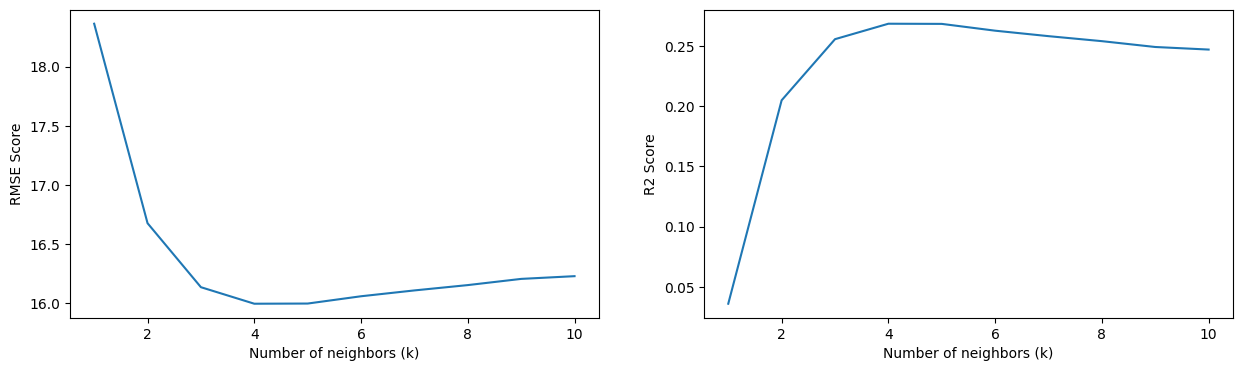

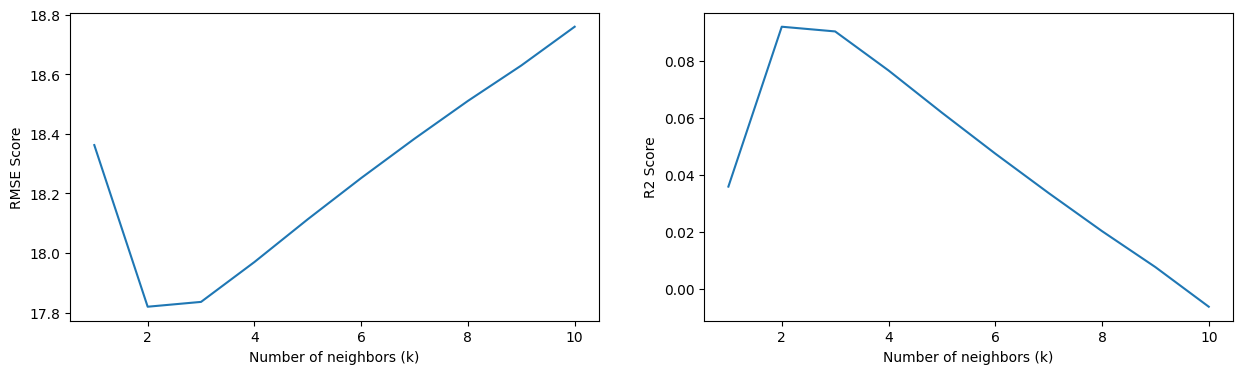

In [46]:
def plot_model_scores(RMSE_knn, R2_knn):
    figure, axis = plt.subplots(1, 2, figsize=(15, 4)) 

    KNN_y_label = "Number of neighbors (k)"

    KNN_X = RMSE_knn.keys()

    axis[0].plot(KNN_X, RMSE_knn.values())
    axis[0].set_xlabel(KNN_y_label)
    axis[0].set_ylabel("RMSE Score")

    axis[1].plot(KNN_X, R2_knn.values())
    axis[1].set_xlabel(KNN_y_label)
    axis[1].set_ylabel("R2 Score")

    plt.show()

plot_model_scores(RMSE_knn, R2_knn)
plot_model_scores(RMSE_knn_oversampled, R2_knn_oversampled)

We note that the point of *minimum* in the **RMSE** plot is equal to the point of *maximum* in the **R2** plot.
This is given by the fact that the two scores are inversely proportional.

The analysis was conducted with $k=1,\ldots,10$.
Intuitively, analysing models with $k$ larger than $10$ would be useless, since they would just keep *underfitting* the data, hence getting worse score.

In [53]:

print(f"RMSE: {RMSE_knn[best_k]}")
print(f"R2: {R2_knn[best_k]}")

# Oversampled data
print(f"RMSE with Oversampled data: {RMSE_knn_oversampled[best_k_oversampled]}")
print(f"R2 with Oversampled data: {R2_knn_oversampled[best_k_oversampled]}")

RMSE: 15.996204170872758
R2: 0.26841163203143736
2
RMSE with Oversampled data: 17.819861693499345
R2 with Oversampled data: 0.09209256569054369


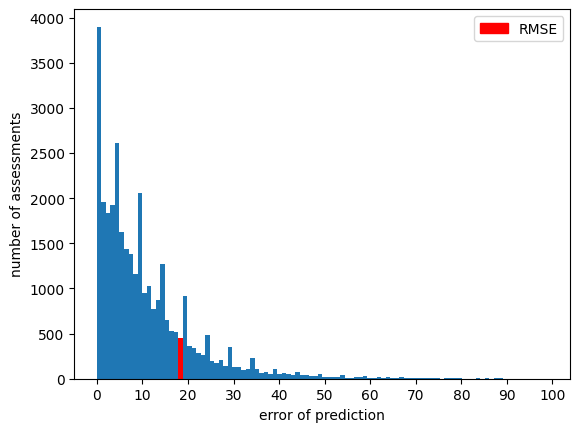

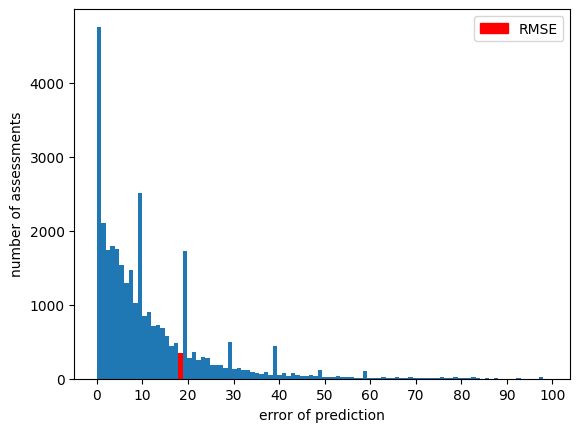

In [48]:
import matplotlib.patches as mpatches
def plot_error_of_prediction(y_test, y_pred):
    y_pred= y_pred.round()
    y_test_ = y_test.round()
    y_diff= y_pred-y_test_.values
    y_diff= abs(y_diff)
    errori = np.zeros(100)

    errori[0] = np.logical_and(y_diff >= 0, y_diff <= 1).sum()
    for i in range(1,99):
        errori[i] = np.logical_and(y_diff > i, y_diff <= i+1).sum()

    x = [i for i in range(100)]
    plt.xticks([i*10 for i in range(11)])
    _, _, patches = plt.hist(x=x,weights=errori,bins =100)
    patches[18].set_facecolor('r')
    plt.xlabel("error of prediction")
    plt.ylabel("number of assessments")
    red_patch = mpatches.Patch(color='red', label='RMSE')
    plt.legend(handles=[red_patch]) 
    plt.show()

plot_error_of_prediction(y_test, y_predictions[best_k])
plot_error_of_prediction(y_test_oversampled, y_predictions_oversampled[best_k_oversampled])

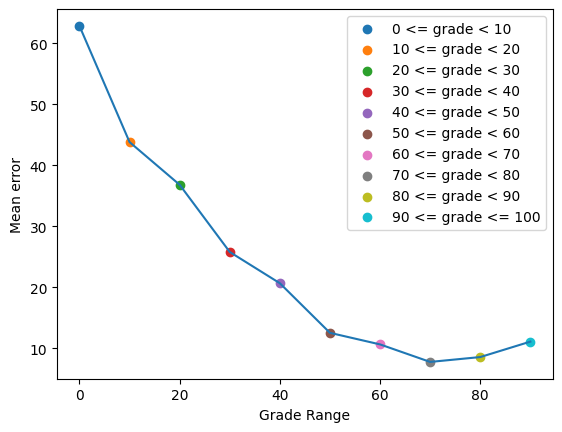

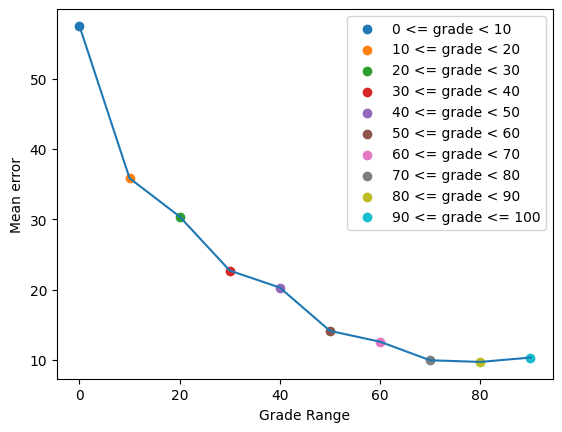

In [49]:
n_classes = 10

def plot_mean_error(y_test, y_pred):
    errors = np.absolute(y_test.values - y_pred)

    mean_diff = np.zeros(n_classes)

    for i in range(n_classes):
        r = int(100/n_classes)
        mean_diff[i] = errors[np.logical_or(y_test//(r) == i, y_test//(r) + i == n_classes*2 - 1)].mean()
    classes = [i*10 for i in range(n_classes)]

    for j, c in enumerate(classes):
        plt.scatter(c, mean_diff[j], label=f'{(j*10)} <= grade <{"=" if j == n_classes-1 else ""} {(j+1)*10}')

    plt.plot(classes, mean_diff)

    plt.xlabel("Grade Range")
    plt.ylabel("Mean error")

    plt.legend()

    plt.show()

plot_mean_error(y_test, y_predictions[best_k])
plot_mean_error(y_test_oversampled, y_predictions_oversampled[best_k_oversampled])

The plot below represents the number of wrong prediction for some error values.

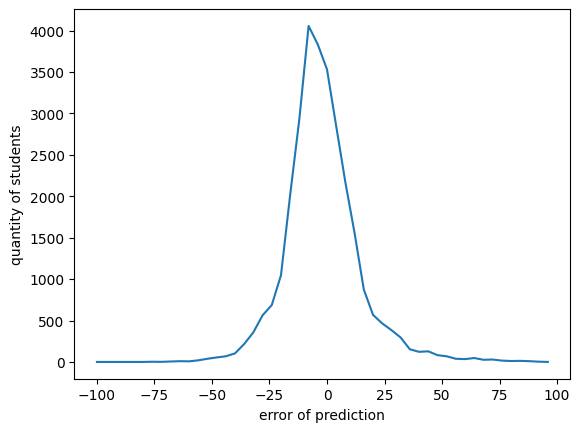

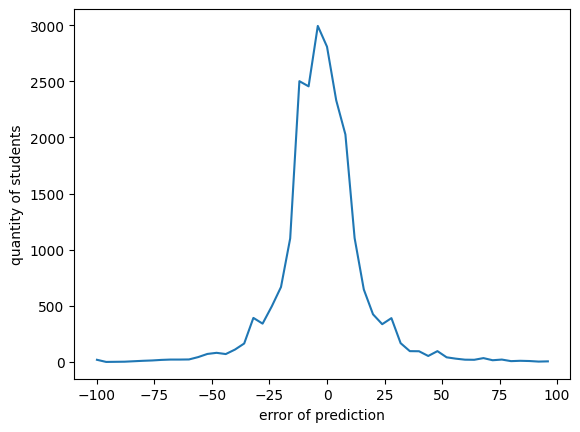

In [50]:

def plot_quantity_error(y_test, y_pred):
    intervals=50
    sliceInterval= 200/intervals
    quantities=np.zeros(intervals)
    values=np.zeros(intervals)
    y_diff=y_pred-y_test.values

    for j in range(intervals):
        quantities[j]= np.logical_and(y_diff >(sliceInterval*j)-100,y_diff < (sliceInterval*(j+1))-100).sum()
        values[j]=(sliceInterval*j)-100

    plt.plot(values,quantities)
    plt.xlabel("error of prediction")
    plt.ylabel("quantity of students")
    plt.show()

plot_quantity_error(y_test, y_predictions[best_k])
plot_quantity_error(y_test_oversampled, y_predictions_oversampled[best_k_oversampled])